# 📓 Credit Card Fraud Detection Report

This notebook analyzes **credit card transactions** to detect fraudulent activity.  
It is a simplified version of a dashboard project, adapted for google colab notebook.

---

## 📌 Steps in this notebook
1. Load the dataset (`creditcard.csv`)  
2. Apply simple filters (time range and transaction type)  
3. Calculate key metrics  
4. Show sample data  
5. Visualize transactions over time  
6. Visualize amount distribution  
7. Export filtered data  

In [1]:
# --- Setup ---
import pandas as pd
import matplotlib.pyplot as plt

## 🔹 Load the Dataset
We use the dataset `creditcard.csv`.


In [2]:
# --- Load Data ---
data_path = "/content/creditcard.csv"  # Change path if needed
df = pd.read_csv(data_path)

# Create time bins (each 10,000 seconds)
df['TimeBin'] = (df['Time'] // 10000) * 10000

print("✅ Data loaded successfully!")
print("Shape:", df.shape)

df.head()


✅ Data loaded successfully!
Shape: (39702, 32)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,TimeBin
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0


## 🔹 Apply Filters
We will filter transactions based on:
- **Time range**  
- **Transaction type**: All, Legitimate, or Fraudulent  


In [3]:
# --- Apply Filters ---

# Time range filter
min_time = int(df['Time'].min())
max_time = int(df['Time'].max())

print(f"Time Range in dataset: {min_time} to {max_time}")

Time Range in dataset: 0 to 39929


In [4]:
# Example filter (adjust as needed)
time_start, time_end = min_time, max_time
filtered_df = df[(df['Time'] >= time_start) & (df['Time'] <= time_end)]


In [5]:
# Transaction type filter
trans_type = "All"  # Change to "Legitimate" or "Fraudulent"

if trans_type == "Legitimate":
    filtered_df = filtered_df[filtered_df['Class'] == 0]
elif trans_type == "Fraudulent":
    filtered_df = filtered_df[filtered_df['Class'] == 1]

print("✅ Filters applied!")

✅ Filters applied!


## 🔹 Key Metrics
We calculate:
- Total number of transactions  
- Number of fraud transactions  
- Fraud rate (percentage)  


In [6]:
# --- Metrics ---
total_trans = len(filtered_df)
fraud_trans = filtered_df['Class'].sum()
fraud_rate = (fraud_trans / total_trans * 100) if total_trans > 0 else 0

print("📊 Metrics")
print("Total Transactions:", total_trans)
print("Fraud Transactions:", fraud_trans)
print(f"Fraud Rate: {fraud_rate:.2f}%")


📊 Metrics
Total Transactions: 39702
Fraud Transactions: 104.0
Fraud Rate: 0.26%


## 🔹 Sample of Filtered Data
We display a few random transactions from the filtered dataset.


In [7]:
# --- Data Sample ---
filtered_df.sample(min(10, total_trans)) if total_trans > 0 else pd.DataFrame()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,TimeBin
31665,36459,-0.739049,-0.454315,1.892859,-1.944540,-0.188674,-0.071891,-0.471296,0.249033,-1.146991,...,1.134127,-0.275157,-0.501453,0.176882,-0.164996,0.073074,0.099359,39.90,0.0,30000
438,315,-1.014693,0.444918,2.259005,0.336946,-0.492326,-0.649977,0.542460,-0.201798,0.491987,...,0.829358,-0.105669,1.005763,-0.098694,0.396781,0.307894,0.098746,69.99,0.0,0
22314,32172,1.141790,-1.391626,1.747258,-0.173389,-2.044600,0.914159,-1.861797,0.609239,0.827561,...,0.883060,-0.068715,0.277170,0.323444,-0.026853,0.091105,0.017343,32.95,0.0,30000
1603,1248,-0.584760,1.195511,1.854416,1.618547,0.372657,0.786861,0.556246,0.265269,-1.405815,...,0.051254,-0.097023,-0.347970,-0.226104,-0.151714,-0.052412,0.044327,34.13,0.0,0
14747,25979,0.159079,0.733457,0.445752,0.625173,-0.099010,-0.876583,0.318161,0.036148,0.542150,...,-0.078302,0.039767,0.287362,-0.295719,0.289576,0.222274,0.019180,12.31,0.0,20000
24285,33158,-2.473851,-1.400356,2.308729,0.776612,0.979501,-0.767551,-0.077335,-0.535075,0.641565,...,0.488302,-1.040235,0.665223,-0.588711,-0.676609,0.168966,-0.539121,214.00,0.0,30000
26056,33890,0.669665,-0.936355,-1.538525,0.324458,1.879429,3.498592,-0.023538,0.716238,-0.184721,...,-0.220353,-0.427704,1.024043,0.715723,-0.299635,-0.039962,0.071146,325.10,0.0,30000
20369,30992,1.237409,0.029216,0.161310,0.504398,0.094319,0.236445,-0.051401,-0.004518,0.389950,...,-0.464946,-0.075148,-0.702604,0.498719,0.452742,-0.010348,0.002725,15.00,0.0,30000
11997,20736,1.229501,-0.251071,1.044164,-0.516525,-1.119607,-0.764824,-0.632605,-0.131725,3.064291,...,0.043644,-0.037355,0.350935,0.482963,-0.726925,0.066635,0.031303,11.85,0.0,20000
1590,1238,0.971669,-0.623931,-0.241042,-1.211771,-0.733360,-1.482698,0.429638,-0.353530,0.946584,...,0.158697,-0.153616,0.671966,0.504499,-0.005851,-0.031914,0.034033,160.00,0.0,0


## 📈 Transactions Over Time
We group transactions into **time bins** (10,000 seconds each) and compare:  
- Total transactions  
- Fraudulent transactions  


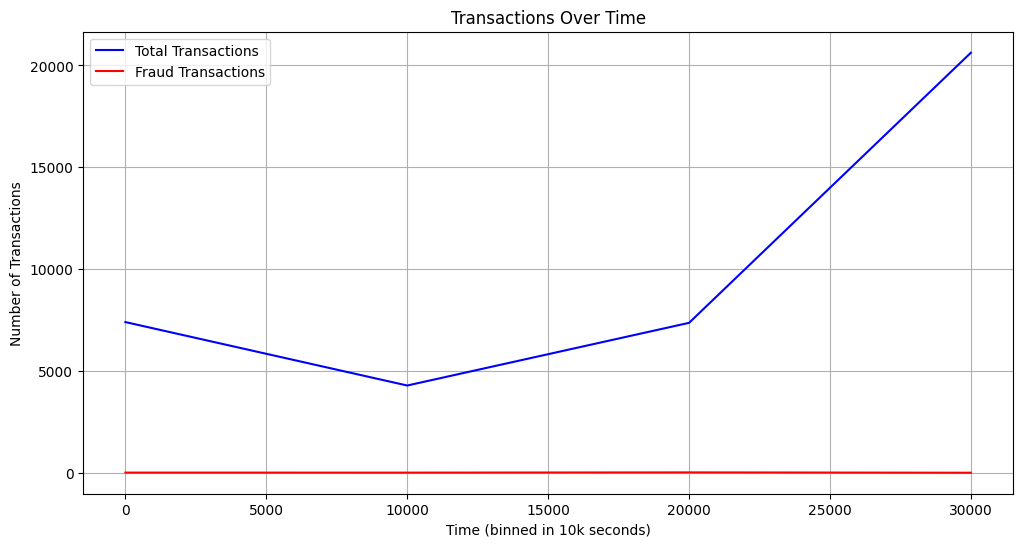

In [8]:
# --- Transactions Over Time ---

trans_over_time = filtered_df.groupby("TimeBin").size().reset_index(name="Total")
fraud_over_time = filtered_df[filtered_df['Class'] == 1].groupby("TimeBin").size().reset_index(name="Fraud")

plt.figure(figsize=(12,6))
plt.plot(trans_over_time["TimeBin"], trans_over_time["Total"], label="Total Transactions", color="blue")
if not fraud_over_time.empty:
    plt.plot(fraud_over_time["TimeBin"], fraud_over_time["Fraud"], label="Fraud Transactions", color="red")
plt.xlabel("Time (binned in 10k seconds)")
plt.ylabel("Number of Transactions")
plt.title("Transactions Over Time")
plt.grid(True)
plt.legend()
plt.show()


## 💰 Transaction Amount Distribution
We visualize the **distribution of transaction amounts** for both:  
- Legitimate transactions (blue)  
- Fraudulent transactions (red)  


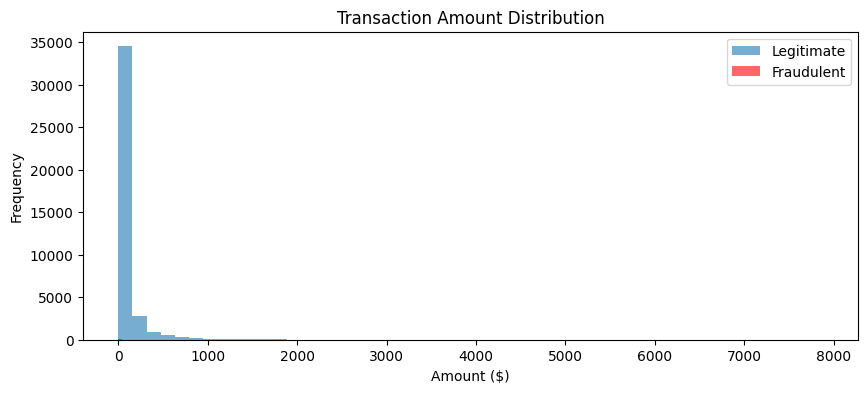

In [9]:
# --- Transaction Amount Distribution ---

plt.figure(figsize=(10,4))
filtered_df[filtered_df['Class'] == 0]['Amount'].plot(kind='hist', bins=50, alpha=0.6, label='Legitimate')
filtered_df[filtered_df['Class'] == 1]['Amount'].plot(kind='hist', bins=50, alpha=0.6, color='red', label='Fraudulent')
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.title("Transaction Amount Distribution")
plt.legend()
plt.show()


## 📥 Export Filtered Data
Finally, we save the filtered dataset into a **CSV file** for further analysis.


In [21]:
# --- Export Filtered Data to CSV ---

output_file = "filtered_transactions.csv"
filtered_df.to_csv(output_file, index=False)

print(f"✅ Filtered data saved to {output_file}")


✅ Filtered data saved to filtered_transactions.csv


## 🤖 Simple Machine Learning Model (Logistic Regression)

To demonstrate fraud detection, we train a **Logistic Regression model** using transaction features.  
This is a baseline model, meant to show how ML can be applied for fraud classification.


In [10]:
# --- ML Model Setup ---
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Features (all columns except Time, TimeBin, and Class)
X = df.drop(columns=["Time", "TimeBin", "Class"])
y = df["Class"]

# Drop rows with NaN values in the target variable
df_cleaned = df.dropna(subset=['Class'])
X = df_cleaned.drop(columns=["Time", "TimeBin", "Class"])
y = df_cleaned["Class"]


# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

## 📊 Model Evaluation
We check:
- **Accuracy**
- **Precision**
- **Recall**
- **F1-score**


In [11]:
# --- Evaluation Metrics ---
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Legitimate", "Fraudulent"]))


📊 Classification Report:

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00      7920
  Fraudulent       0.60      0.71      0.65        21

    accuracy                           1.00      7941
   macro avg       0.80      0.86      0.83      7941
weighted avg       1.00      1.00      1.00      7941



## 🔲 Confusion Matrix
The confusion matrix helps us understand **true positives, false positives, true negatives, and false negatives**.


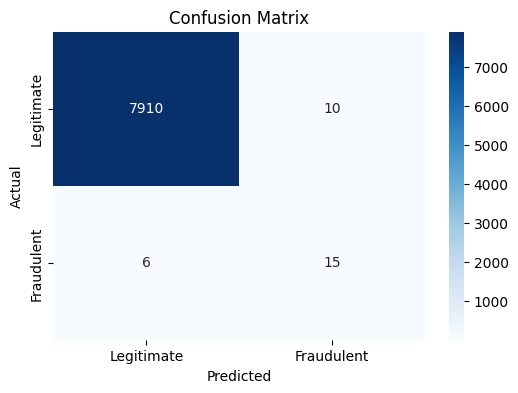

In [12]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Fraudulent"], yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
